In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive',force_remount=True)
root_dir="/content/gdrive/My Drive/project"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
people=pd.read_csv(root_dir+"/people.csv",parse_dates=True)
act_train=pd.read_csv(root_dir+"/act_train.csv",parse_dates=True)
act_test=pd.read_csv(root_dir+"/act_test.csv",parse_dates=True)


In [4]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
#merge people and activity files
train= pd.merge(people,act_train,on="people_id")
test = pd.merge(people,act_test, on= "people_id")
submission_id=test.activity_id

In [7]:
train.shape,test.shape

((2197291, 55), (498687, 54))

In [8]:
#check number of nan values
train.isnull().sum()

people_id                  0
char_1_x                   0
group_1                    0
char_2_x                   0
date_x                     0
char_3_x                   0
char_4_x                   0
char_5_x                   0
char_6_x                   0
char_7_x                   0
char_8_x                   0
char_9_x                   0
char_10_x                  0
char_11                    0
char_12                    0
char_13                    0
char_14                    0
char_15                    0
char_16                    0
char_17                    0
char_18                    0
char_19                    0
char_20                    0
char_21                    0
char_22                    0
char_23                    0
char_24                    0
char_25                    0
char_26                    0
char_27                    0
char_28                    0
char_29                    0
char_30                    0
char_31                    0
char_32       

In [9]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()

In [11]:
X=train.drop(columns=['people_id','activity_id','outcome'])
X.head()

,char_1_x,group_1,char_2_x,date_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,date_y,activity_category,char_1_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y
0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76
1,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
2,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
3,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1
4,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1


In [12]:
X_col=X.columns

In [13]:
for i in X_col:
  X[i]=encoder.fit_transform(X[i].astype('str'))

In [14]:
Y=train.outcome

In [15]:
df_test=test.drop(columns=['people_id','activity_id'])

In [16]:
df_test_col=df_test.columns

In [17]:
for i in df_test_col:
  df_test[i]=encoder.fit_transform(df_test[i].astype('str'))

In [18]:
Y=np.array(Y)

In [19]:
feature_list=list(X.columns)

In [20]:
#converting Features to numpy array
X=np.array(X)

In [21]:
#Training and validation split
from sklearn.model_selection import train_test_split

In [22]:
#Setting seed to 0 for reproducibility 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [23]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train, test_size=0.25,random_state=0)

In [24]:
#Looking at sizes of train test data
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Labels Shape:', Y_val.shape)

Training Features Shape: (1235976, 52)
Training Labels Shape: (1235976,)
Testing Features Shape: (549323, 52)
Testing Labels Shape: (549323,)
Validation Features Shape: (411992, 52)
Validation Labels Shape: (411992,)


In [25]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
model=RandomForestClassifier(n_estimators=100,max_features='sqrt')

In [27]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
Y_pred_val = model.predict(X_val)
Y_pred_val_prob=model.predict_proba(X_val)[:,1]

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(Y_val, Y_pred_val)

array([[226655,   2384],
       [   969, 181984]])

In [31]:
from sklearn.metrics import roc_auc_score,roc_curve

In [32]:
def plot_roc_curve(actual,predicted):
  #calculating scores
  auc=roc_auc_score(actual,predicted)
  print("ROC AUC=%0.3f"%auc)
  #calculate roc curve
  fpr, tpr, threshold= roc_curve(actual,predicted)
  #plot roc curve for the model
  plt.plot(fpr,tpr,linestyle='--',marker='.')
  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

ROC AUC=1.000


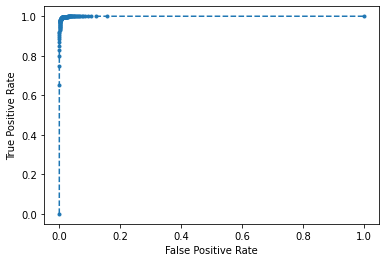

In [33]:
plot_roc_curve(Y_val,Y_pred_val_prob)

In [34]:
Y_pred_test_prob=model.predict_proba(X_test)[:,1]

In [35]:
Y_pred_test=model.predict(X_test)

ROC AUC=1.000


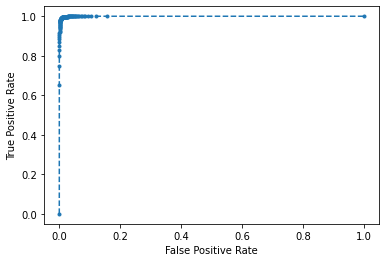

In [36]:
plot_roc_curve(Y_test,Y_pred_test_prob)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    305391
           1       0.99      0.99      0.99    243932

    accuracy                           0.99    549323
   macro avg       0.99      0.99      0.99    549323
weighted avg       0.99      0.99      0.99    549323



In [39]:
def check_imbalance(label):
  class_0=0
  class_1=1
  for i in range(0,len(label)):
    if(label[i]==0):
      class_0+=1
    else:
      class_1+=1
  print("class_0 count:",class_0)
  print("class_1 count:", class_1)

Since, we are getting ROC score as 1, the model is definitely overfitting and hence cant be used on our testing dataset. 

We now try implementing XGBoost

In [40]:
#XGBoost
from xgboost import XGBClassifier

In [41]:
model_1=XGBClassifier()

In [42]:
model_1.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
Y_pred_val_XG=model_1.predict_proba(X_val)[:,1]

ROC AUC=0.927


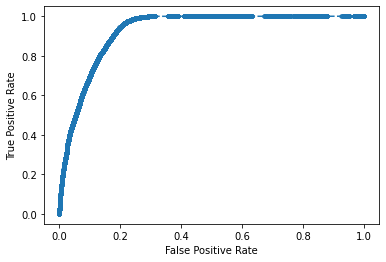

In [44]:
plot_roc_curve(Y_val,Y_pred_val_XG)

In [45]:
Y_pred_XG_test=model_1.predict_proba(X_test)[:,1]

ROC AUC=0.927


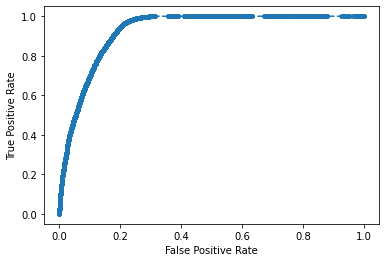

In [46]:
plot_roc_curve(Y_test,Y_pred_XG_test)

After submitting XGBoost model, which showed a high accuracy in our training dataset, it managed an accuracy of on 80% in the testing dataset. We now preprocess the data and apply neural nets to achieve a better accuracy. 

Data Preprocessing

In [47]:
def preprocess(data):
  data= data.drop(['date_x','date_y','people_id','activity_id'],axis=1)
  data=data.fillna('missing')
  return data
train=preprocess(train)
test= preprocess(test)

In [48]:
train.dtypes

char_1_x             object
group_1              object
char_2_x             object
char_3_x             object
char_4_x             object
char_5_x             object
char_6_x             object
char_7_x             object
char_8_x             object
char_9_x             object
char_10_x              bool
char_11                bool
char_12                bool
char_13                bool
char_14                bool
char_15                bool
char_16                bool
char_17                bool
char_18                bool
char_19                bool
char_20                bool
char_21                bool
char_22                bool
char_23                bool
char_24                bool
char_25                bool
char_26                bool
char_27                bool
char_28                bool
char_29                bool
char_30                bool
char_31                bool
char_32                bool
char_33                bool
char_34                bool
char_35             

In [49]:
categorical_data = train.select_dtypes(include=['object'])
categorical_data.nunique()

char_1_x                 2
group_1              29899
char_2_x                 3
char_3_x                43
char_4_x                25
char_5_x                 9
char_6_x                 7
char_7_x                25
char_8_x                 8
char_9_x                 9
activity_category        7
char_1_y                52
char_2_y                33
char_3_y                12
char_4_y                 8
char_5_y                 8
char_6_y                 6
char_7_y                 9
char_8_y                19
char_9_y                20
char_10_y             6516
dtype: int64

In [50]:
# we will embed the columns who have unique values of more than 12 and for others one hot encoding
column_names=categorical_data.columns
print("Categorical Columns:\n"+str(column_names))

Categorical Columns:
Index(['char_1_x', 'group_1', 'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x',
       'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x', 'activity_category',
       'char_1_y', 'char_2_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y',
       'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y'],
      dtype='object')


In [51]:
embed_columns=categorical_data.nunique()>12
one_hot_columns=categorical_data.nunique()<=12
embed_names=column_names[embed_columns]
one_hot_names=column_names[one_hot_columns]
numeric_colnames=train.select_dtypes(exclude=['object']).columns
print("\nEmbed Columns:\n"+ str(embed_names))
print("\none hot Columns:\n"+ str(one_hot_names))
print("\nnumeric Columns:\n"+ str(numeric_colnames))



Embed Columns:
Index(['group_1', 'char_3_x', 'char_4_x', 'char_7_x', 'char_1_y', 'char_2_y',
       'char_8_y', 'char_9_y', 'char_10_y'],
      dtype='object')

one hot Columns:
Index(['char_1_x', 'char_2_x', 'char_5_x', 'char_6_x', 'char_8_x', 'char_9_x',
       'activity_category', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y',
       'char_7_y'],
      dtype='object')

numeric Columns:
Index(['char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38', 'outcome'],
      dtype='object')


In [52]:
numeric_colnames=numeric_colnames.drop('outcome')

In [53]:
#maximum values in numeric columns
np.amax(train[numeric_colnames],axis=0)

char_10_x      1.0
char_11        1.0
char_12        1.0
char_13        1.0
char_14        1.0
char_15        1.0
char_16        1.0
char_17        1.0
char_18        1.0
char_19        1.0
char_20        1.0
char_21        1.0
char_22        1.0
char_23        1.0
char_24        1.0
char_25        1.0
char_26        1.0
char_27        1.0
char_28        1.0
char_29        1.0
char_30        1.0
char_31        1.0
char_32        1.0
char_33        1.0
char_34        1.0
char_35        1.0
char_36        1.0
char_37        1.0
char_38      100.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8714720b8>,
      dtype=object)

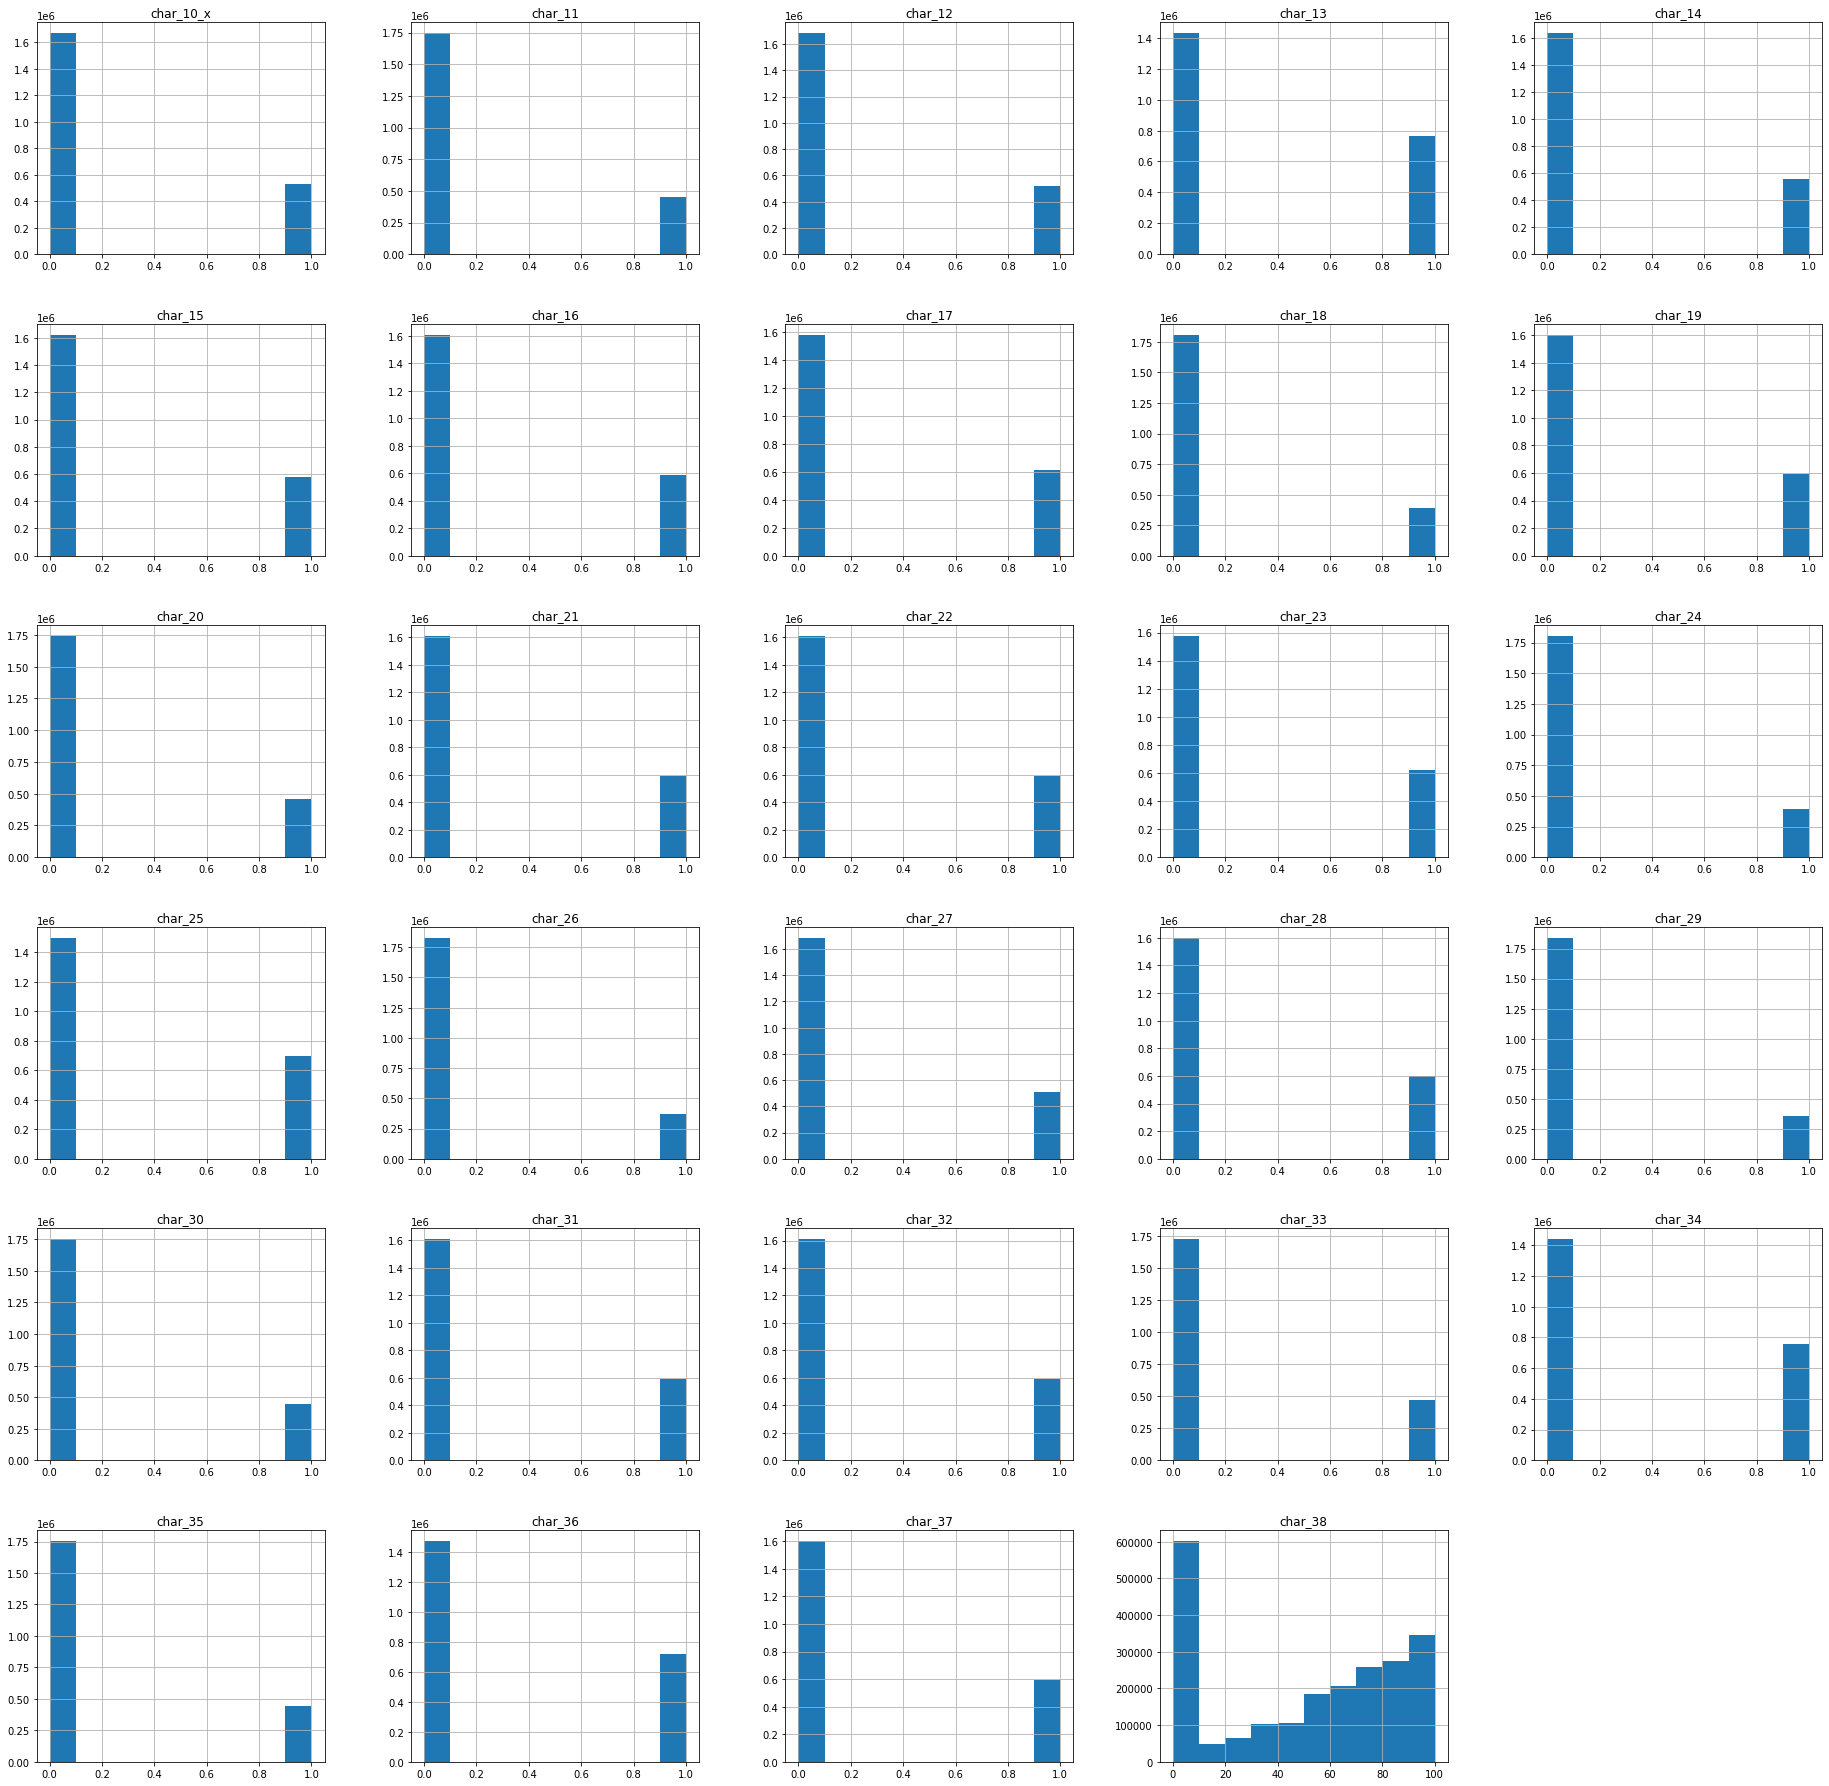

In [54]:
#Distribution of numeric columns
train[numeric_colnames].astype('float32').hist(figsize=(32,32))

In [55]:
#Feature Engineering using tf.feature_columns API

In [56]:
#Train and validation split
train_set, val_set = train_test_split(train,test_size=0.2,random_state=0)
test_set= test
print(len(train_set),'train set')
print(len(val_set),'validation set')
print(len(test_set),'test set')

1757832 train set
439459 validation set
498687 test set


In [57]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32, train=False, buffer_size=50000):
    dataframe = dataframe.copy()
    if train:
        labels = dataframe.pop('outcome')
    else:
        labels = tf.ones(shape=dataframe.shape[0]) * -1 # Will be ignored at test time
        
    dataset = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        buffer_size = buffer_size if buffer_size < dataframe.shape[0] else dataframe.shape[0]
        dataset = dataset.shuffle(buffer_size, seed=42)
        
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [58]:
train_dataset = dataframe_to_dataset(train_set, train=True, shuffle=True, batch_size=4096)
val_dataset = dataframe_to_dataset(val_set, train=True, batch_size=4096)
test_dataset = dataframe_to_dataset(test_set, batch_size=4096)

In [59]:
feature_columns=[]
for name in numeric_colnames:
  feature_columns.append(tf.feature_column.numeric_column(key=name, dtype=tf.float32, default_value=-1))

In [60]:
for name in one_hot_names:
  vocabulary = train[name].unique()
  categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(
                          key=name, vocabulary_list=vocabulary, default_value=-1)
    
  onehot_column = tf.feature_column.indicator_column(categorical_column)
  feature_columns.append(onehot_column)

In [61]:
for name in embed_names:
  vocabulary = train[name].unique()
  categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(
                          key=name, vocabulary_list=vocabulary, default_value=-1)
    
  embedding_dimensions = 16 if len(vocabulary) < 500 else 256
  embed_column = tf.feature_column.embedding_column(categorical_column, dimension=embedding_dimensions)
  feature_columns.append(embed_column)

In [62]:
print(feature_columns[0],'\n')
print(feature_columns[35],'\n')
print(feature_columns[48],'\n')

NumericColumn(key='char_10_x', shape=(1,), default_value=(-1,), dtype=tf.float32, normalizer_fn=None) 

IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='activity_category', vocabulary_list=('type 4', 'type 2', 'type 3', 'type 5', 'type 1', 'type 7', 'type 6'), dtype=tf.string, default_value=-1, num_oov_buckets=0)) 

EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='char_9_y', vocabulary_list=('missing', 'type 8', 'type 1', 'type 2', 'type 7', 'type 13', 'type 9', 'type 15', 'type 4', 'type 6', 'type 3', 'type 12', 'type 10', 'type 17', 'type 18', 'type 14', 'type 5', 'type 16', 'type 19', 'type 11'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=16, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x7fb8706c3d68>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True, use_safe_embedding_lookup=True) 



In [63]:
processing_layer = keras.layers.DenseFeatures(feature_columns)

In [64]:
model = keras.models.Sequential()
model.add(processing_layer)
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(16, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.01)))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Nadam(0.01),
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr_plateau = keras.callbacks.ReduceLROnPlateau(patience=3)

In [69]:
history = model.fit(train_dataset, 
                    epochs=20, 
                    validation_data=val_dataset, 
                    callbacks=[early_stopping, reduce_lr_plateau], 
                    steps_per_epoch=20, validation_steps=20)

Epoch 1/20
20/20 [==============================] - 11s 531ms/step - loss: 0.0611 - accuracy: 0.9760 - val_loss: 0.0647 - val_accuracy: 0.9750 - lr: 0.0100
Epoch 2/20
20/20 [==============================] - 11s 529ms/step - loss: 0.0595 - accuracy: 0.9771 - val_loss: 0.0649 - val_accuracy: 0.9750 - lr: 0.0100
Epoch 3/20
20/20 [==============================] - 11s 539ms/step - loss: 0.0612 - accuracy: 0.9760 - val_loss: 0.0642 - val_accuracy: 0.9756 - lr: 0.0100
Epoch 4/20
20/20 [==============================] - 11s 536ms/step - loss: 0.0600 - accuracy: 0.9765 - val_loss: 0.0649 - val_accuracy: 0.9755 - lr: 0.0100
Epoch 5/20
20/20 [==============================] - 11s 543ms/step - loss: 0.0598 - accuracy: 0.9770 - val_loss: 0.0643 - val_accuracy: 0.9752 - lr: 0.0100
Epoch 6/20
20/20 [==============================] - 11s 550ms/step - loss: 0.0601 - accuracy: 0.9768 - val_loss: 0.0641 - val_accuracy: 0.9751 - lr: 0.0100
Epoch 7/20
20/20 [==============================] - 11s 542ms/st

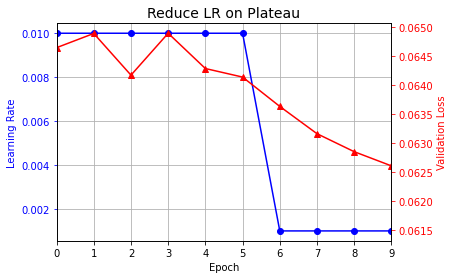

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, 10 - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [73]:
val_preds = model.predict(val_dataset, verbose=True)

108/108 [==============================] - 16s 151ms/step


In [74]:
from sklearn.metrics import roc_auc_score
y_true = list(val_dataset.map(lambda x,y: y).unbatch().as_numpy_iterator())
roc_auc_score(y_true, val_preds)

0.9980566906834055

In [75]:
test_preds = model.predict(test_dataset, verbose=True)


122/122 [==============================] - 19s 155ms/step


Preparing results for submission.

In [76]:
ids = np.array(submission_id).reshape((-1,)) # make 1-dimensional
preds = test_preds.reshape((-1,)) # make 1-dimensional
print(ids.shape, preds.shape)

my_submission = pd.DataFrame({'activity_id': ids, 'outcome': preds})

my_submission.to_csv(root_dir+'REDHAT_submission_1.csv', index=False)

(498687,) (498687,)
